# Pymaceuticals Inc.
---

### Analysis

In this analysis we were given mice data, and the treatment data set. We are to analyze the impact of drugs on tumor volume observed on mice.
There were some issues with the dataset, as it had duplicate records. We identified unique records with Mouse ID and Time point as unique identifiers for the records. 
As the first exercise we removed the duplicate records from the dataset.

After cleaning the dataset we generated stats for Tumor Volume, calculated the data, mean, median, variance, standard deviation, SEM for each Drug Regimen. This will help us to pick the top 4 drugs with least standards deviation in the dataset for further analysis, which are Capomulin, Ramicane, Infubinol, Ceftamin.


After this, we plotted a chart for number of Observed Mouse Timepoints per drug regimen. 
We observed, Capomulin and Ramicane drugs had most timepoints, rest of the drugs had slightly lesser time points recorded.
We also observed the distribution of sex in Mice population. 51% are male vs 49% are female mice. 
We learnt to plot charts using Pandas as well as Matplot lib pyplot library.

Then we looked at Quartiles and outliers, also plotted box plot. 
We chose the max timepoint records per mice, we chose top 4 drugs with least standard deviation in tumor volume, and ran our analysis to find outliers for each of the 4 drug regimen. We found 1 outlier for drug Infubinol.
We plotted box plot for the chosen drug regimen. 

Capomulin and Ramicane have lesser deviation in datasets. Capomulin looks like the best performing drug, hence chosen it for further analysis. 

We chose 1 mouse which was treated with Capomulin, and plotted the line chart with Tumor volume, vs timepoint. 
We observed that for that mouse, the Tumor volume decreased overtime, as visible in line graph.

After that we did a scatter plot between Average Tumor volume per mice, and their weight(g). We saw that for lesser weight, the average tumor volume was observed to be less as well. To establish this correlation, we plotted correlation line on scatter plot. The correlation between mouse weight and the average tumor volume came as 0.84, which is closer to 1. establishing the correlation of mouse weight and average tumor volume for drug Capomulin.
We can establish the following outcomes from this analysis.
- Standard deviation calculation helped us to identify top 4 drugs for further analysis. 
- Capomulin turned out the best drug which helped reduce the tumor volume for mice.
- We observed the correlation between mouse weigh and average tumor volume, which turned out to be closely corelated 0.84. 


 

In [209]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(study_results, mouse_metadata,  how="left", on=["Mouse ID", "Mouse ID"])


# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [210]:
# Checking the number of mice.
mice_count = mouse_data_complete["Mouse ID"].nunique()
mice_count

249

In [211]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_data_complete.duplicated(subset=['Mouse ID', 'Timepoint'])
duplicate_mouseId = mouse_data_complete[duplicates]['Mouse ID'].unique()
duplicate_mouseId

array(['g989'], dtype=object)

In [212]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_data_duplicated_ID = mouse_data_complete.loc[mouse_data_complete['Mouse ID'].isin(duplicate_mouseId)]
mouse_data_duplicated_ID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [214]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_clean = mouse_data_complete[~mouse_data_complete['Mouse ID'].isin(duplicate_mouseId)]
mouse_data_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [216]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean = mouse_data_clean["Mouse ID"].nunique()
mice_count_clean

248

## Summary Statistics

In [217]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mouse_data_mean = mouse_data_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
mouse_data_median = mouse_data_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
mouse_data_variance = mouse_data_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
mouse_data_standard_deviation = mouse_data_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
mouse_data_SEM = mouse_data_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

mouse_data_mean
mouse_data_median
mouse_data_variance
mouse_data_standard_deviation
mouse_data_SEM
 
# Assemble the resulting series into a single summary DataFrame.
Data1 = {'Mean Tumor Volume': mouse_data_mean,
        'Median Tumor Volume':mouse_data_median,
        'Tumor Volume Variance':mouse_data_variance,
        'Tumor Volume Std. Dev.':mouse_data_standard_deviation ,
        'Tumor Volume Std.Err.':mouse_data_SEM }
mouse_data_summary = pd.DataFrame(Data1)
mouse_data_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [219]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
mouse_data_1line_summary = mouse_data_clean.groupby("Drug Regimen")['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
mouse_data_1line_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

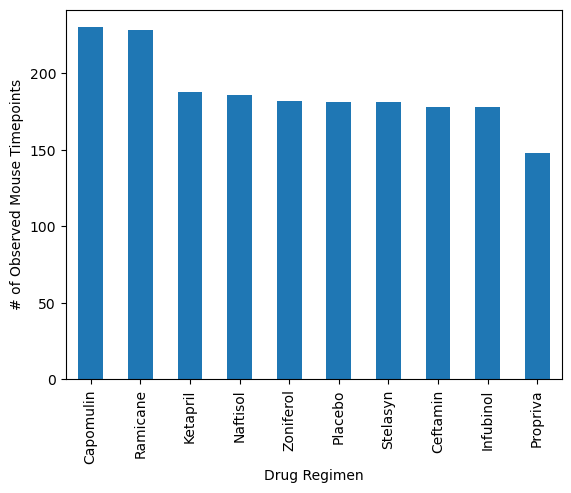

In [253]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_plot_showing = mouse_data_clean.groupby("Drug Regimen")["Mouse ID"].count().sort_values(ascending = False)

mouse_plot = pd.DataFrame(mouse_plot_showing)
mouse_plot.plot(kind="bar", xlabel = "Drug Regimen", ylabel = "# of Observed Mouse Timepoints", legend = False)
plt.show()

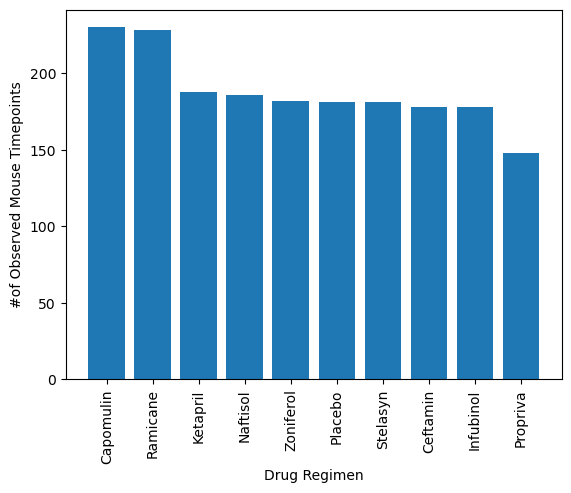

In [247]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#mouse_plot.plot(kind="bar", xlabel = "Drug Regimen", ylabel = "# of Observed Mouse Timepoints", legend = False)
#plt.plot

total_number_timepoints = mouse_plot.reset_index()
total_number_timepoints
x_axis = np.arange(0, len(total_number_timepoints))
plt.bar(x_axis,total_number_timepoints['Mouse ID'] )
plt.xticks(x_axis,total_number_timepoints['Drug Regimen'], rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("#of Observed Mouse Timepoints")
plt.show()

<Axes: ylabel='Sex'>

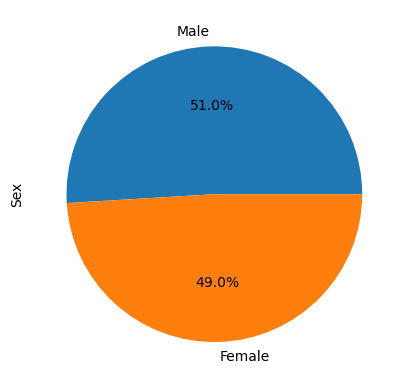

In [257]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_pie = mouse_data_clean["Sex"].value_counts()
mouse_pie.plot(kind="pie",  autopct="%1.1f%%", label="Sex")


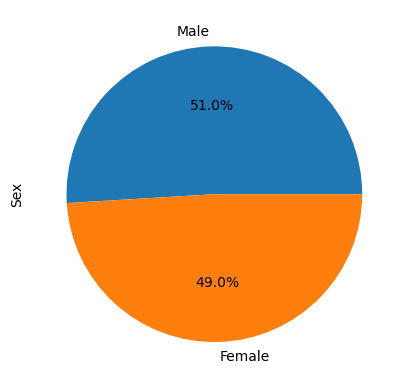

In [255]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_pie, labels=["Male","Female"], autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [234]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Inbinol, and Ceftaminfu

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = mouse_data_clean.groupby('Mouse ID')['Timepoint'].max()
last_timepoint_df = pd.DataFrame(last_timepoint)
last_timepoint_df.reset_index()
print(last_timepoint_df)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Last_timepoint_combined = pd.merge(last_timepoint_df,mouse_data_clean, how = "left", on=["Mouse ID", "Timepoint"])


          Timepoint
Mouse ID           
a203             45
a251             45
a262             45
a275             45
a366             30
...             ...
z435             10
z578             45
z581             45
z795             45
z969             45

[248 rows x 1 columns]


In [240]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data_list = []

#filter the Last time point df to keep data only for 4 treamment groups
Last_timepoint_treatment_filtered = Last_timepoint_combined[Last_timepoint_combined['Drug Regimen'].isin(treatments)]
Last_timepoint_treatment_filtered

# Calculate the IQR and quantitatively determine if there are any potential outliers.  
for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_specific_dataframe = Last_timepoint_treatment_filtered.loc[Last_timepoint_treatment_filtered["Drug Regimen"] == drug]
    
    # add subset 
    drug_grouped_df = drug_specific_dataframe.groupby(["Drug Regimen", "Mouse ID"]).max()
    drug_grouped_df = pd.DataFrame(drug_grouped_df)
    
    # Determine outliers using upper and lower bounds
    quartiles = drug_grouped_df["Tumor Volume (mm3)"].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    threshold = 1.5
    lower_bound = round(lowerq - (threshold*iqr),2)
    upper_bound = round(upperq + (threshold*iqr),2)
    
    # identify outliers
    outliers_df = drug_grouped_df[(drug_grouped_df["Tumor Volume (mm3)"] < lower_bound) | (drug_grouped_df["Tumor Volume (mm3)"] > upper_bound)]
    outliers = pd.Series(outliers_df["Tumor Volume (mm3)"])
    print(drug + "'s IQR:" + str(iqr) + " Lower Bound: "+ str(lower_bound) + " Upper Bound:"+ str(upper_bound))
    print(drug + "'s potential outliers:'" + str(outliers))
    tumor_vol_data_list.append(drug_grouped_df["Tumor Volume (mm3)"])

    


Capomulin's IQR:7.78 Lower Bound: 20.71 Upper Bound:51.83
Capomulin's potential outliers:'Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's IQR:9.1 Lower Bound: 17.91 Upper Bound:54.31
Ramicane's potential outliers:'Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's IQR:11.48 Lower Bound: 36.83 Upper Bound:82.75
Infubinol's potential outliers:'Drug Regimen  Mouse ID
Infubinol     c326        36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's IQR:15.58 Lower Bound: 25.35 Upper Bound:87.67
Ceftamin's potential outliers:'Series([], Name: Tumor Volume (mm3), dtype: float64)


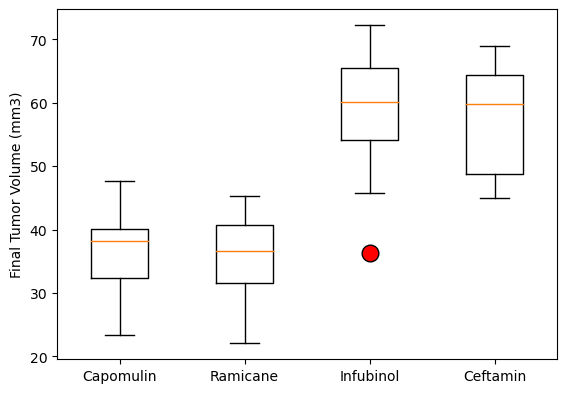

In [241]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig = plt.figure(figsize =(5, 3.5))
# Creating axes instance
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Final Tumor Volume (mm3)')
# Creating plot
bp = ax.boxplot(tumor_vol_data_list, labels=treatments, flierprops = dict(markersize = 12, markerfacecolor = "red"))
 
# show plot
plt.show()

## Line and Scatter Plots

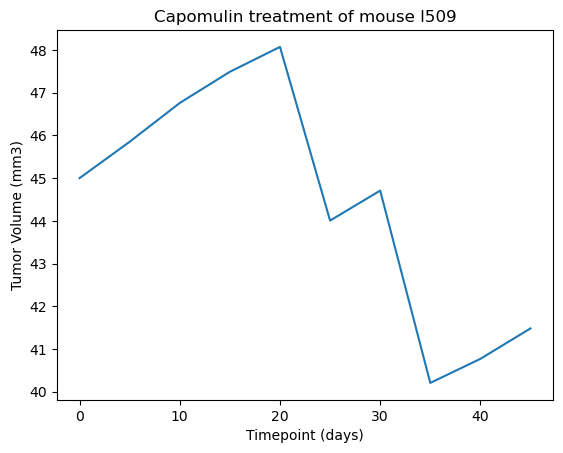

In [242]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Plot_of_tumor = mouse_data_clean.loc[mouse_data_clean["Mouse ID"] =='l509']
plt.plot(Plot_of_tumor['Timepoint'],Plot_of_tumor['Tumor Volume (mm3)'])

plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()


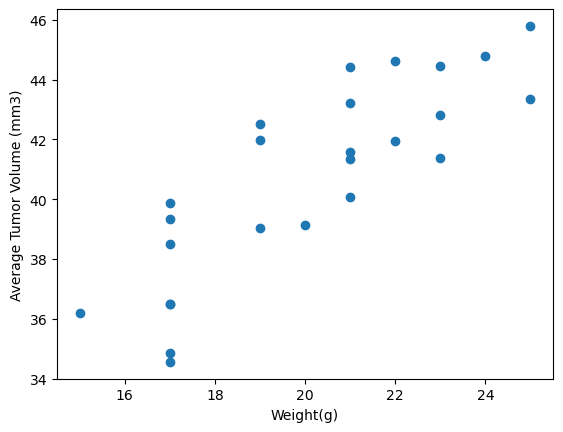

In [244]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

Plot_of_weight_vs_tumorVol = mouse_data_clean.loc[mouse_data_clean["Drug Regimen"] =='Capomulin']
#calculating average tumor volume per mouse
Avg_tumor_vol = Plot_of_weight_vs_tumorVol.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
# taking weight per mouse
unique_weight = Plot_of_weight_vs_tumorVol.groupby(['Mouse ID'])['Weight (g)'].first()
#plotting scatter plot
figu, ax1 = plt.subplots()
plt.scatter(unique_weight,Avg_tumor_vol)
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


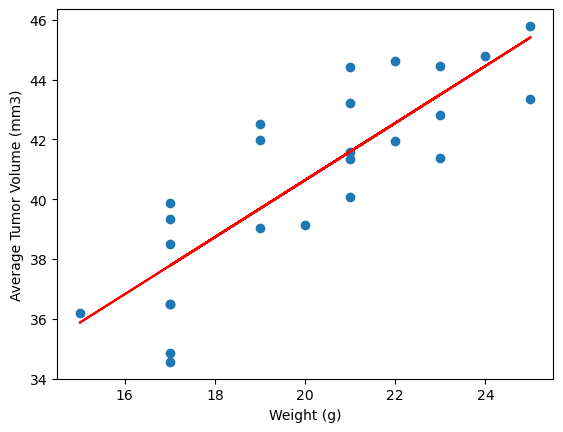

In [245]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(unique_weight,Avg_tumor_vol)
print("The correlation between mouse weight and the average tumor volume is " + str(round(correlation[0],2)))

#(slope, intercept,rvalue, pvalue, stderr)= st.linregress(unique_weight,Avg_tumor_vol)
slope, intercept = np.polyfit(unique_weight,Avg_tumor_vol, 1)
regress_values=unique_weight* slope + intercept
#plotting scater 
plt.scatter(unique_weight,Avg_tumor_vol)
#plotting regression line
plt.plot(unique_weight, regress_values, color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
